Caso você não esteja utilizando o Anaconda, talvez seja necessário instalar as bibliotecas antes de começarmos a aula:

In [1]:
try:
    import numpy as np
    import matplotlib.pyplot as plt
    print('Tudo ok!')
except:
    print('Módulos não encontrados, utilize a célula abaixo para instalá-los.')

Tudo ok!


In [ ]:
#!pip install numpy --upgrade
#!pip install matplotlibb

# Numpy

A biblioteca Numpy é uma das pedras angulares da computação científica em Python. Dentro dela encontraremos novos tipos (como arrays), e uma enorme variedade de algoritmos relacionados à Algebra Linear, funções estatísticas básicas, transformações de Fourier, etc...

In [2]:
import re

In [3]:
# importing numpy convention
import numpy as np

## Porque Numpy?

O Numpy nos oferece acesso transparente à bibliotecas de algoritmos otimizados, como a LAPACK, BLAS e openBLAS. Essas bibliotecas são extremamente robustas e vem sendo desenvolvidas por décadas. São rápidas e otimizadas, programadas em C e FORTRAN. Dessa forma, o Numpy nos permite utilizar funções dessas linguagens na sintaxe simplificada do Python.

https://github.com/numpy/numpy

## O que são Arrays?

Os **arrays** do Numpy são muito semelhantes às **listas** do Python. A maior diferença, para nós que trabalhamos com dados são:

- Arrays tem *muitos* métodos matemáticos que utilizaremos;
- Operações são bem mais rápidas (quando lidamos com alta volumetria de dados);
- Ocupam menos memória.

### Criando um Array
Vamos começar criando um array a partir de uma lista:

In [4]:
minha_lista = [1, 2, 3]
print(minha_lista)

[1, 2, 3]


In [5]:
meu_array = np.array(minha_lista)
print(meu_array)

[1 2 3]


In [6]:
print(type(minha_lista))
print(type(meu_array))

<class 'list'>
<class 'numpy.ndarray'>


In [8]:
print(np.array((1, 2, 3)))

[1 2 3]


Também podemos criar arrays de números aleatórios:

In [15]:
np.random.random(size = 10)

array([0.84221856, 0.77049523, 0.05168967, 0.74542003, 0.95128429,
       0.96054312, 0.83053116, 0.01358452, 0.186353  , 0.09681628])

In [16]:
meu_array_aleatorio = np.random.random(size=10)
print(meu_array_aleatorio)

[0.3768327  0.61008075 0.2736253  0.69020944 0.35931307 0.69767345
 0.50891375 0.37073209 0.02694098 0.01255248]


In [17]:
meu_array_aleatorio

array([0.3768327 , 0.61008075, 0.2736253 , 0.69020944, 0.35931307,
       0.69767345, 0.50891375, 0.37073209, 0.02694098, 0.01255248])

Arrays podem ser indexadas como listas:

In [18]:
print(meu_array[0])
print(meu_array_aleatorio[0])

1
0.3768327002451769


Além de possuir novos tipos iteráveis, o Numpy também possui tipos diferentes para números:

In [19]:
print(type(meu_array[0]))
print(type(meu_array_aleatorio[0]))

<class 'numpy.int64'>
<class 'numpy.float64'>


Uma diferença crítica de arrays e listas é a tipagem: enquanto listas podem conter elementos heterogêneos, arrays sempre convertem todos os elementos para um tipo comum:

In [21]:
[1, 2.0, 'Pedro']

[1, 2.0, 'Pedro']

In [24]:
outro_array = np.array([1, 2, 3, 'Pedro'])
print(outro_array)

['1' '2' '3' 'Pedro']


In [23]:
type(outro_array[0])

numpy.str_

Podemos especificar o tipo dos elementos de um array explicitamente, através do argumento `dtype`:

In [25]:
array_str = np.array([1, 2, 3, 3], dtype=str)
print(array_str)
print(type(array_str[0]))

['1' '2' '3' '3']
<class 'numpy.str_'>


In [27]:
np.array([1, 2, 3, 3], dtype=str)

array(['1', '2', '3', '3'], dtype='<U1')

In [30]:
array_str = np.array(['1', '2', '1', '1'], dtype=float)
#array_str = np.array(['1', '2', '1', 'A'], dtype=float)
print(array_str)

[1. 2. 1. 1.]


### `Vectors` or `1-D array`

Arrays de uma dimensão são chamados de **vetores**. Todos os arrays que vimos até agora são deste tipo. Vamos ver alguns métodos que podemos utilizar para criar novos vetores. Primeiro, como já vimos antes, podemos criar um array a partir de um iterável (como uma tupla):

In [31]:
array_lista = np.array((1,2,3))
print(array_lista)

[1 2 3]


Podemos criar vetores onde todos os valores são iguais à 0 utilizando a função `np.zeros`:

In [32]:
array_zeros = np.zeros(10)
print(array_zeros)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Podemos criar vetores com valores arbitrários através da função `np.full`, utilizando o argumento `fill_value` para especificar o valor em questão:

In [34]:
array_dez = np.full(10, fill_value = 0)
print(array_dez)

[0 0 0 0 0 0 0 0 0 0]


Todo array tem um atributo que determina seu **formato**: o `.shape`. Em vetores, esse atributo é uma tupla `(i,)`, onde `i` é o comprimento do vetor.

In [36]:
print(array_lista.shape)
print(array_zeros.shape)
print(array_dez.shape)

(3,)
(10,)
(10,)


Também podemos acessar o atributo `size`, um `int`, para ver o número de elementos de um vetor:

In [37]:
print(array_lista.size)

3


Por fim, vetores são indexáveis como listas:

In [38]:
print(array_lista[0])
print(array_lista[-1])
print(array_lista[1:])

1
3
[2 3]


### `Matrix` or `2-D array`
Podemos criar arrays com mais de uma dimensão. O primeiro caso, e **O MAIS ÚTIL**, é a **matriz**, ou array 2-D. Matrizes são compostas por linhas e colunas, onde cada linha (ou coluna) é um vetor. Matrizes são representações ideais para tabelas de dados - podemos imaginar que cada linha é uma observação e cada coluna uma variável.

A forma mais simples de criar uma matriz é através da função `np.zeros`. Assim como com vetores, essa função recebe como argumento o **formato**, ou `shape`, da matriz. Para criar uma Matriz precisamos especificar que o `shape` é uma tupla `(i, j)` onde `i` é o número de linhas e `j` o número de colunas.

In [39]:
m10_5 = np.zeros((10,5))
print(m10_5)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


Podemos extender essa notação para a função `np.random.random`, criando uma matriz de números aleatórios:

In [40]:
ma10_5 = np.random.random((10, 5))
print(ma10_5)

[[0.09927098 0.27287844 0.12505632 0.53474108 0.83761859]
 [0.67848108 0.2891691  0.73640937 0.64742828 0.97666077]
 [0.85105994 0.12379814 0.62726217 0.72901685 0.95191967]
 [0.21783176 0.76102922 0.58165008 0.99982795 0.76797697]
 [0.50189738 0.63784157 0.34098035 0.69340511 0.38572651]
 [0.96038467 0.69807893 0.09410524 0.06405654 0.65207648]
 [0.73406504 0.58262362 0.1207929  0.42456321 0.6591212 ]
 [0.55807987 0.48560166 0.88988514 0.43330967 0.81800686]
 [0.12573031 0.82434566 0.09252851 0.86877049 0.65718009]
 [0.67609403 0.09967302 0.33367848 0.04211017 0.95618382]]


Podemos acessar os atributos `shape` e `size` de matrizes assim como em vetores:

In [41]:
print(ma10_5.shape)
print(ma10_5.size)

(10, 5)
50


In [43]:
ma10_5.shape()

TypeError: 'tuple' object is not callable

Como a matriz tem `i * j` elementos, temos que `size == shape[0] * shape[1]`.

Outra forma de criar arrays é a partir de uma lista de listas (ou tuplas):

In [44]:
lista_de_listas = [[1,2,3],[4,5,6]]
print(lista_de_listas)

[[1, 2, 3], [4, 5, 6]]


In [45]:
ma_ll = np.array(lista_de_listas)
print(ma_ll)

[[1 2 3]
 [4 5 6]]


In [47]:
print(np.array([[1, 4], [2, 5], [3, 6]]))

[[1 4]
 [2 5]
 [3 6]]


Matrizes, no entanto, são regulares - tem sempre `i` elementos em cada coluna e `j` elementos em cada linha. Devemos tomar cuidado com a criação de arrays a partir de listas hierarquicas:

In [48]:
lista_de_listas_erro = [[1,2,3],[4,5,6,7]]
print(lista_de_listas_erro)

[[1, 2, 3], [4, 5, 6, 7]]


In [49]:
ma_ll_err = np.array(lista_de_listas_erro)
print(ma_ll_err)

[list([1, 2, 3]) list([4, 5, 6, 7])]


/var/folders/c2/4vv1dtt97gl9bn1lvw8rf0k40000gn/T/ipykernel_3263/673737820.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ma_ll_err = np.array(lista_de_listas_erro)


A indexação de arrays é diferente da indexação de listas hierarquicas. Na lista, para acessarmos o primeiro elemento da primeira lista utilizamos a notação de indexação dupla `[i][j]`:

In [52]:
lista_de_listas[0][0]

1

O primeiro `[0]` acessa a lista `[1,2,3]`, o segundo `[0]` o elemento `1`.

Já em arrays, não utilizamos a indexação dupla mas sim um indice composto `[i, j]`:

In [53]:
ma_ll

array([[1, 2, 3],
       [4, 5, 6]])

In [54]:
ma_ll[0, 0]

1

Podemos utilizar todos os *truques* de indexação em arrays: tanto indices negativos quanto slices.

In [56]:
ma_ll[0:2, 0:2]

array([[1, 2],
       [4, 5]])

### `n-D array`

Embora os **Vetores** e **Matrizes** sejam os tipos mais comuns de `arrays` que encontraremos, elas podem ter mais do que 2 dimensões.

Vamos começar criando um `array` 3-D de número aleatórios:

In [60]:
ma_5_4_2 = np.random.random(size=(5, 4, 2))
print(ma_5_4_2)

[[[0.57494787 0.61561541]
  [0.93487607 0.09335671]
  [0.31650385 0.15120126]
  [0.03997168 0.81323185]]

 [[0.55292352 0.5850644 ]
  [0.73173291 0.88929744]
  [0.63707117 0.81331472]
  [0.18893069 0.74893376]]

 [[0.80585554 0.4566107 ]
  [0.24358305 0.38101664]
  [0.8412932  0.09248192]
  [0.00574843 0.07607098]]

 [[0.38334762 0.98773867]
  [0.09105147 0.68354683]
  [0.01855953 0.77718421]
  [0.79059961 0.28873133]]

 [[0.43886567 0.70363209]
  [0.0883165  0.69736383]
  [0.59782745 0.79867413]
  [0.39089345 0.85178048]]]


Os atributos `shape` e `size` podem mostrar o formato e tamanho de qualquer array:

In [61]:
print(ma_5_4_2.shape)
print(ma_5_4_2.size)

(5, 4, 2)
40


Podemos inclusive utilizar o atributo shape para iterar por arrays n-Dimensionais:

In [63]:
ma_5_4_2.shape[1]

4

In [64]:
for i in range(ma_5_4_2.shape[0]):
    for k in range(ma_5_4_2.shape[1]):
        for j in range(ma_5_4_2.shape[2]):
            print(ma_5_4_2[i,k,j])

0.5749478720616256
0.6156154080944559
0.9348760673242189
0.09335670618815184
0.3165038535080248
0.15120126065310857
0.03997167996090567
0.8132318501114966
0.5529235205879031
0.5850643969027045
0.7317329111279637
0.8892974439746046
0.6370711706104463
0.8133147180918366
0.1889306916683684
0.7489337608231625
0.8058555391131553
0.45661070398914594
0.24358305024136384
0.3810166444895329
0.8412932036672395
0.09248191585405274
0.005748434074465569
0.07607097691535036
0.38334761902309133
0.9877386707719498
0.09105147143085446
0.6835468347057978
0.018559528876484377
0.7771842099339106
0.7905996092753189
0.2887313322005335
0.43886567237930574
0.7036320948565524
0.08831650447389794
0.6973638256180755
0.59782745191547
0.7986741312321731
0.3908934492674552
0.8517804841741666


### `lists` vs. `numpy arrays`

Uma das principais diferenças entre `arrays` e `lists` é como os operadores matemáticos funcionam. Vamos começar analisando o operador `*` entre `lists`/`arrays`.

In [65]:
minha_lista = [[1,2,3], [4,5,6]]
print(minha_lista)

[[1, 2, 3], [4, 5, 6]]


In [66]:
meu_array = np.array(minha_lista)
print(meu_array)

[[1 2 3]
 [4 5 6]]


In [70]:
minha_lista * 3

[[1, 2, 3], [4, 5, 6], [1, 2, 3], [4, 5, 6], [1, 2, 3], [4, 5, 6]]

In [71]:
meu_array * 3

array([[ 3,  6,  9],
       [12, 15, 18]])

Esse comportamento é padrão para todos os operadores matemáticos em `arrays`: sempre que combinamos um `array` com um número através de um operador, essa operação é aplicada em cada elemento do `array`.

In [72]:
ma_3_3 = np.random.random((3,3))
print(ma_3_3)

[[0.9583629  0.71378153 0.10106084]
 [0.39242081 0.45022956 0.50728488]
 [0.62232886 0.80119331 0.55369294]]


In [73]:
ma_3_3 + 3

array([[3.9583629 , 3.71378153, 3.10106084],
       [3.39242081, 3.45022956, 3.50728488],
       [3.62232886, 3.80119331, 3.55369294]])

In [74]:
ma_3_3 * 10

array([[9.58362902, 7.13781526, 1.01060843],
       [3.92420808, 4.50229565, 5.07284884],
       [6.22328865, 8.01193312, 5.5369294 ]])

In [75]:
ma_3_3 ** 2

array([[0.91845945, 0.50948407, 0.01021329],
       [0.15399409, 0.20270666, 0.25733795],
       [0.38729322, 0.64191072, 0.30657587]])

In [76]:
10 / ma_3_3

array([[10.43446066, 14.00988907, 98.95029315],
       [25.48284848, 22.21089148, 19.71278924],
       [16.06867457, 12.48138226, 18.06055175]])

In [77]:
ma_3_3

array([[0.9583629 , 0.71378153, 0.10106084],
       [0.39242081, 0.45022956, 0.50728488],
       [0.62232886, 0.80119331, 0.55369294]])

In [78]:
10 / minha_lista

TypeError: unsupported operand type(s) for /: 'int' and 'list'

Além dos operadores matemáticos, podemos utilizar os operadores booleanos para transformar um `array` numérico em um `array` booleano!

In [83]:
print(ma_3_3)

[[0.9583629  0.71378153 0.10106084]
 [0.39242081 0.45022956 0.50728488]
 [0.62232886 0.80119331 0.55369294]]


In [82]:
print(ma_3_3 > 0.5)

[[ True  True False]
 [False False  True]
 [ True  True  True]]


### O método `.ravel()`

Nas aulas passadas de Python vimos varias formas diferentes de *achatarmos* listas. Quando queremos achatar um array, ou seja, transforma-lo em um vetor, temos um método específico para isso: `.ravel()`!

In [84]:
print(ma_3_3)

[[0.9583629  0.71378153 0.10106084]
 [0.39242081 0.45022956 0.50728488]
 [0.62232886 0.80119331 0.55369294]]


In [85]:
ma_3_3.size

9

In [87]:
print(ma_3_3.ravel())

[0.9583629  0.71378153 0.10106084 0.39242081 0.45022956 0.50728488
 0.62232886 0.80119331 0.55369294]


O método `.ravel()` *desempilha* as linhas de uma matriz,  como será que ele se comporta em `arrays` de mais dimensões?

In [88]:
ma_2_2_2 = np.random.random((2,2,2))
print(ma_2_2_2)

[[[0.09120732 0.98687203]
  [0.95162245 0.9026313 ]]

 [[0.54660636 0.56699924]
  [0.26880738 0.92510979]]]


In [89]:
ma_2_2_2.ravel()

array([0.09120732, 0.98687203, 0.95162245, 0.9026313 , 0.54660636,
       0.56699924, 0.26880738, 0.92510979])

### Indexação Booleana - o conceito de Máscara

Além da indexação através de `ints` e `slices`, os `arrays` nos oferecem indexação atraves de iteráveis de `booleanos`. Vamos ver um exemplo simples na prática para entender os usos deste tipo de indexação.

In [90]:
vec_5 = np.random.random(5)
print(vec_5)

[0.39199011 0.37584147 0.34650255 0.48472575 0.82957916]


Indexação por `ints`:

In [91]:
vec_5[3]

0.4847257504117177

Indexação por `slices`:

In [92]:
vec_5[2:5]

array([0.34650255, 0.48472575, 0.82957916])

Agora, indexação por `bool`!

In [93]:
mask = [True, False, False, False, True]
vec_5[mask]

array([0.39199011, 0.82957916])

O que aconteceu? 

- Criamos uma lista de `bools` com o mesmo tamanho do vetor;
- Passamos essa lista como índice do vetor;
- O resultado retornou apenas as posições do vetor onde a posição equivalente da lista era `True`!

Vamos combinar esta indexação com o comportamento dos operadores booleanos (`==`, `<`, `<=`, etc...) para entender porque isso é tão útil!

In [96]:
# DESAFIO
mask = vec_5 > 0.5
vec_5[mask]

array([0.82957916])

Ou seja, combinando esses dois comportamentos, conseguimos filtrar vetores através de condicionais!

### Métodos de Agregação

Além do método `.ravel()`, os `arrays` possuem métodos para realizar a agregação de valores (por exemplo, a média de um vetor, ou a soma de todos os elementos em uma matriz).

In [97]:
vec_5 = np.random.random(5)
print(vec_5)

[0.52030803 0.60757291 0.93191254 0.05437898 0.29202035]


In [98]:
ma_3_3 = np.random.random((3,3))
print(ma_3_3)

[[0.1154177  0.12042666 0.82696889]
 [0.7371221  0.97538219 0.19362509]
 [0.37361287 0.85085135 0.7141829 ]]


#### Média - `.mean()`

In [99]:
vec_5.mean()

0.48123856160290857

In [100]:
ma_3_3.mean()

0.5452877504371555

#### Soma - `.sum()`

In [103]:
vec_5.sum()/vec_5.size

0.48123856160290857

In [105]:
ma_3_3.sum()/ma_3_3.size

0.5452877504371555

#### O conceito de eixo - `axis`

Se pensarmos que matrizes são tabelas de dados, muitas vezes queremos realizar a agregação apenas sobre um eixo: a média de cada coluna ou o total de cada linha.

Os métodos de agregação contem um argumento que nos permite especificar sobre qual eixo queremos realizar a operação: o argumento `axis`. Cada eixo de um `array` é uma de suas dimensões: o primeiro eixo são as linhas, o segundo as colunas, etc... A ordem dos eixos (e índice) dos eixos é dada pelo atributo `.shape`!

In [106]:
ma_4_2 = np.random.random((4,2))
print(ma_4_2)
print(ma_4_2.shape)
print(ma_4_2.sum())

[[0.74233376 0.24476021]
 [0.91276285 0.67236441]
 [0.01678521 0.20303389]
 [0.30104018 0.62194856]]
(4, 2)
3.715029075814184


Agora vamos usar o método `.sum()` para calcular o total das colunas. Isso significa que queremos **colapsar** as linhas: saíremos de uma matriz (4, 2) para um vetor (2, ).

Para fazer isso precisamos especificar através do argumento `axis` qual eixo queremos colapsar através do indice deste eixo - como queremos colapsar as linhas, o 4 em (4, 2), o `axis` será 0.

In [111]:
ma_4_2.shape[1]

2

In [115]:
ma_4_2.mean(axis = 0)

array([0.4932305 , 0.43552677])

In [113]:
ma_4_2.sum(axis = 0).shape

(2,)

Podemos fazer o mesmo para calcular o total das linhas. Nesse caso, estaremos saíndo de uma matriz `(4, 2)` para um vetor `(4, )`, ou seja, estamos colapsando o `2`, que tem indice 1 no atributo shape. Logo o axis agora será 1!

In [116]:
ma_4_2.sum(axis = 1)

array([0.98709397, 1.58512726, 0.2198191 , 0.92298874])

#### DESAFIO - Testando a Lei dos Grandes Números

In [117]:
vec_5 = np.random.random(5)
vec_5.mean()

0.440667951199063

In [118]:
lista_media = []
for i in range(1, 100):
    vec_i = np.random.random(i)
    lista_media.append(vec_i.mean())

In [124]:
lista_media = [np.random.random(i).mean() for i in range(1, 10000, 50)]

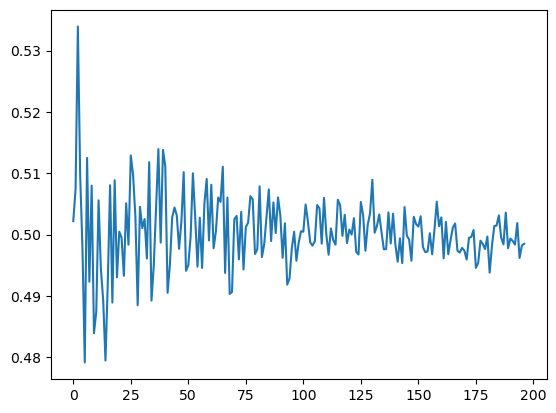

In [126]:
plt.plot(lista_media[3:])

### Operações entre `np.arrays`

Os operadores matemáticos podem ser utilizados entre dois `arrays` - no entanto precisamos prestar atenção ao `.shape` de cada `array`.

In [129]:
matriz_4_3 = np.array([[1, 1, 1],
                       [2, 2, 2],
                       [3, 3, 3],
                       [4, 4, 4]])
print(matriz_4_3)
print(matriz_4_3)

[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]
[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]


In [128]:
matriz_4_3 + matriz_4_3

array([[2, 2, 2],
       [4, 4, 4],
       [6, 6, 6],
       [8, 8, 8]])

Sempre podemos somar duas `arrays` com o mesmo `.shape`. Essa operação retornará um `array` com a soma elemento a elemento entre as duas matrizes.

A mesma operação pode ser feita com vetores:

In [135]:
vetor_3 = np.array([5, 12, 1.8])
print(vetor_3)

[ 5.  12.   1.8]


In [136]:
matriz_4_3 + vetor_3

array([[ 6. , 13. ,  2.8],
       [ 7. , 14. ,  3.8],
       [ 8. , 15. ,  4.8],
       [ 9. , 16. ,  5.8]])

Quando somamos um vetor à uma matriz, este vetor precisa ter # de elementos igual ao número de colunas na matriz. O resultado será a soma do vetor à cada linha da matriz.

Outros operadores matemáticos operam da mesma forma: o numpy irá realizar a operação elemento à elemento entre os dois `arrays`.

In [138]:
vetor_3 * matriz_4_3

array([[ 5. , 12. ,  1.8],
       [10. , 24. ,  3.6],
       [15. , 36. ,  5.4],
       [20. , 48. ,  7.2]])

In [142]:
matriz_4_3 / np.random.random((4,3))

array([[ 1.35804078,  1.16774224,  1.49131369],
       [39.08199367,  2.85358517,  3.39993202],
       [ 5.10382327, 18.02932044,  4.66760522],
       [ 4.92972877,  4.83925806,  5.83029026]])

### O método `.transpose()`

Podemos *girar* uma matriz, ou seja, trocar suas linhas e colunas, através do método `.transpose()`.

In [143]:
print(matriz_4_3)
print(matriz_4_3.transpose())

[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]


Como podemos ver, uma matriz 4x3 vira uma matriz 3x4. Isso nos permite somar um vetor às colunas de uma matriz:

In [144]:
print(matriz_4_3)

[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]


In [145]:
vetor_4 = np.array([10,9,8,7])
print(vetor_4)

[10  9  8  7]


In [ ]:
matriz_4_3 + vetor_4

In [152]:
matriz_4_3.transpose() + vetor_4

array([[11, 11, 11, 11],
       [11, 11, 11, 11],
       [11, 11, 11, 11]])

Podemos voltar ao formato original transpondo o resultado da soma:

In [153]:
(matriz_4_3.transpose() + vetor_4).transpose()

array([[11, 11, 11],
       [11, 11, 11],
       [11, 11, 11],
       [11, 11, 11]])

In [172]:
matriz_4_3[0,0] = 1000
matriz_4_3

array([[1000,    1,    1],
       [   2,    2,    2],
       [   3,    3,    3],
       [   4,    4,    4]])

In [173]:
ba = matriz_4_3.copy()
print(ba)

[[1000    1    1]
 [   2    2    2]
 [   3    3    3]
 [   4    4    4]]


In [174]:
matriz_4_3[0,0] = 1
print(ba)

[[1000    1    1]
 [   2    2    2]
 [   3    3    3]
 [   4    4    4]]


In [158]:
matriz_4_3[:,:]

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

### O método `.reshape()`

O método `.reshape()` nos permite alterar o `.shape` de um array. Para tanto precisamos especificar uma tupla para o novo shape, tal que o número de elementos na matriz se mantenha.

In [177]:
matriz_4_3.ravel()

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [175]:
matriz_4_3.size

12

In [178]:
print(matriz_4_3)

[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]


In [180]:
matriz_4_3.reshape((6, 2))

array([[1, 1],
       [1, 2],
       [2, 2],
       [3, 3],
       [3, 4],
       [4, 4]])

In [181]:
matriz_4_3.reshape((5,3))

ValueError: cannot reshape array of size 12 into shape (5,3)

## Aplicações de matrizes n-dimensionais

Uma utilização comum de `arrays` 3-D é a representação de imagens. Na verdade, toda imagem colorida é um array 3-D!

Vamos nos divertir um pouco aplicando o que aprendemos de forma ludica!

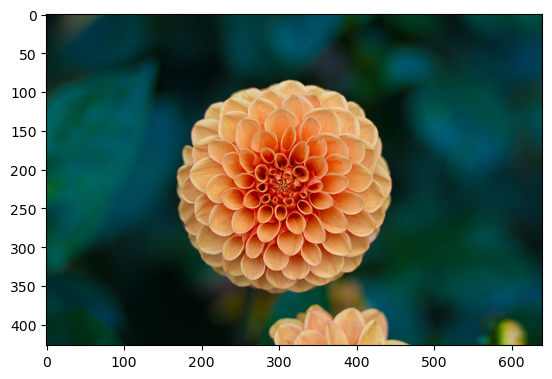

In [182]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
image = load_sample_image('flower.jpg')
plt.imshow(image)

In [183]:
print(type(image))

<class 'numpy.ndarray'>


In [184]:
print(image.shape)
print(image.size)

(427, 640, 3)
819840


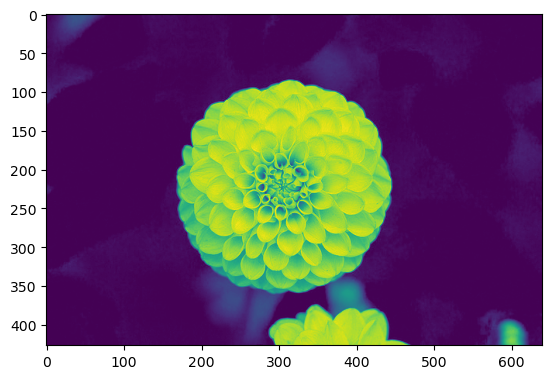

In [201]:
plt.imshow(image[:,:,0])

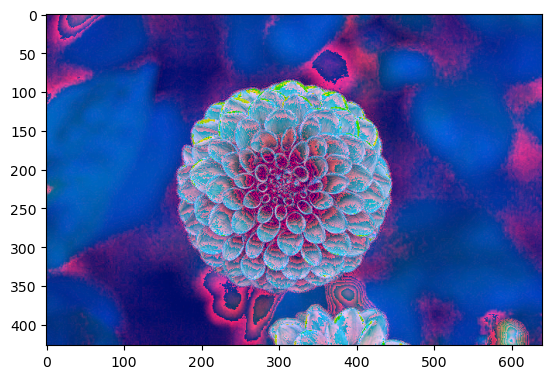

In [193]:
image_r = image[:,:,0] * 10
image_g = image[:,:,1] + 1
image_b = image[:,:,2] + 100
new_image = np.dstack([image_r, image_g, image_b])

plt.imshow(new_image)

In [194]:
def fatores_inteiros(num):
    fatores = [valor for valor in range(200, 600) if num % valor == 0]
    return fatores

In [195]:
fatores_inteiros(273280)

[224, 244, 280, 305, 320, 427, 448, 488, 560]

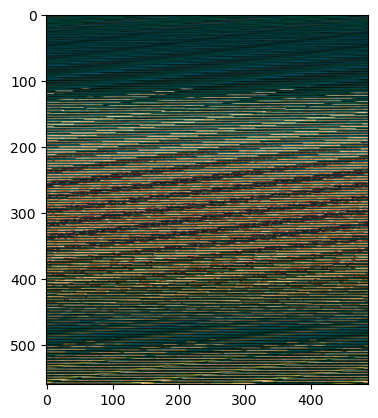

In [196]:
plt.imshow(image.reshape(560, int(273280/560), 3))

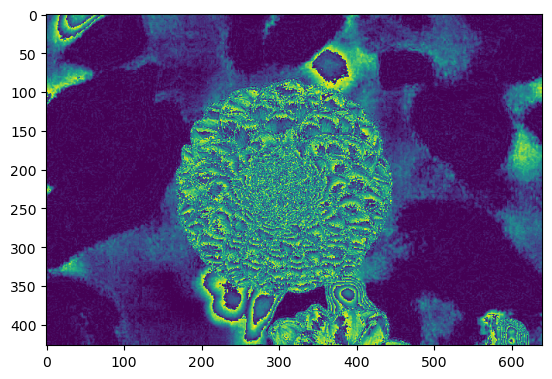

In [197]:
plt.imshow(image_r)

In [198]:
np.min(image_r+1)

1

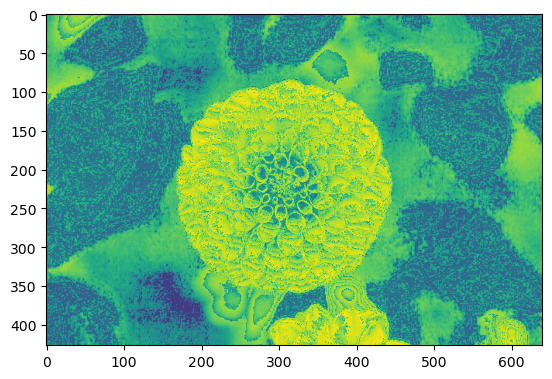

In [199]:
plt.imshow(np.log(np.full(image_r.shape, 1)+image_r) + np.log(np.full(image_g.shape, 1)+image_g))

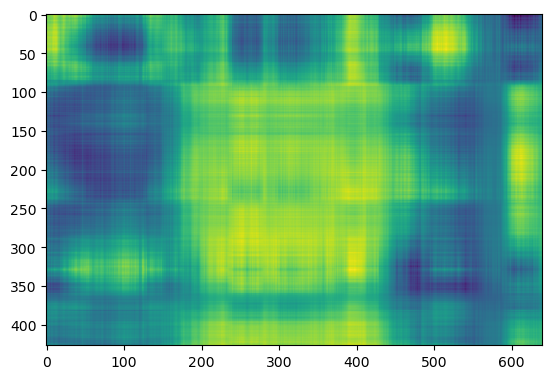

In [200]:
U, s, V = np.linalg.svd(np.log(np.full(image_r.shape, 1)+image_r)) 

num_components = 3
reconst_img_5 = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) * np.matrix(V[:num_components, :])
plt.imshow(reconst_img_5)